#### Load simexpal results

In [1]:
import matplotlib.pyplot as plt
import simexpal
import yaml
import subprocess

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

#### Helper function for cache analysis

In [2]:
def run(cmd):
    proc = subprocess.Popen(cmd, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    stdout, stderr = proc.communicate()
    return stdout, stderr

def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

# Exercise 4

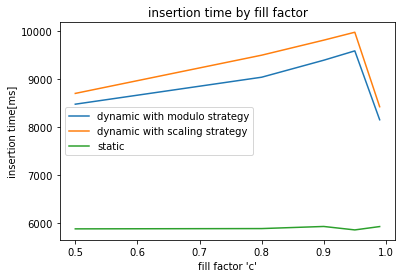

In [3]:
def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

x = vec('static', 'max_fill')

# plot the insertion
plt.plot(x, vec('dynamic_modulo', 'time'), label = 'dynamic with modulo strategy')
plt.plot(x, vec('dynamic_scaling', 'time'), label = 'dynamic with scaling strategy')
plt.plot(x, vec('static', 'time'), label = 'static')
#plt.plot(x, vec('stl', 'time'), label = 'stl')
plt.title('insertion time by fill factor')
plt.xlabel("fill factor 'c'")
plt.ylabel('insertion time[ms]')
plt.legend()
plt.show()

### Question: What fraction of cache-misses can be avoided by using scaling?
* Cache misses with **modulo strategy**:

In [4]:
# perf prints to stderr, our hashing program to stdout
out, err = run(["perf","stat","-e","cache-references,cache-misses","./dev-builds/hashing/bin/hashing","--algo","dynamic_modulo"])
print(err.decode('utf-8').strip())

Running microbenchmark...

 Performance counter stats for './dev-builds/hashing/bin/hashing --algo dynamic_modulo':

       333.632.143      cache-references:u                                          
       235.628.783      cache-misses:u            #   70,625 % of all cache refs    

       8,477336729 seconds time elapsed

       7,287757000 seconds user
       1,171960000 seconds sys


* Cache misses with **scaling strategy**:

In [5]:
# perf prints to stderr, our hashing program to stdout
out, err = run(["perf","stat","-e","cache-references,cache-misses","./dev-builds/hashing/bin/hashing","--algo","dynamic_scaling"])
print(err.decode('utf-8').strip())

Running microbenchmark...

 Performance counter stats for './dev-builds/hashing/bin/hashing --algo dynamic_scaling':

       333.410.348      cache-references:u                                          
       236.739.599      cache-misses:u            #   71,005 % of all cache refs    

       8,786441359 seconds time elapsed

       7,620663000 seconds user
       1,164101000 seconds sys


### Solution: 
The scaling strategy performs worse than the modulo strategy. It also has more cache misses which is surprising. We would have expected that scaling has less cache misses because during resizeing, cells are not scattered in the memory. 

### Task: Investigate how the number of subtables affects performance by plotting the running time of the algorithm vs. the number of subtables. Use c = 0.9 in this experiment. Perform experiments with 1, 2, 4, 8, 16 and 32 subtables

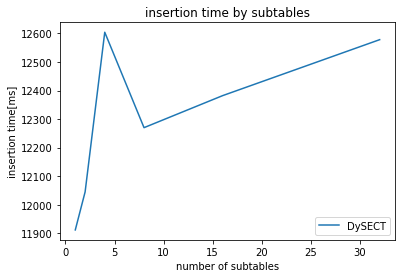

In [6]:
plt.plot(vec('dysect', 'subtables'), vec('dysect', 'time'), label = 'DySECT')
plt.title('insertion time by subtables')
plt.xlabel("number of subtables")
plt.ylabel('insertion time[ms]')
plt.legend()
plt.show()